# Exam 16th of June 2025, 13.00-18.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [98]:
# Insert your anonymous exam ID as a string in the variable below
examID=""


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below distribution using rejection sampling: (Hint: $F$ is the distribution function)

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-x^2-1}{e-2}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$

2. [2p] Produce 100000 samples (**use fewer if it takes too long (more than 10 sec) and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. 
3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2(e^{x^2}-1) x}{e-2} dx
$$
and store the result in `problem1_integral`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Fill in the remaining part of the function `problem1_rejection_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

-----
In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below distribution using rejection sampling: (Hint: $F$ is the distribution function)

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-x^2-1}{e-2}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$
-----

### Derivation of $( f(x) )$, choice of $( g(x) )$, and determination of $( M )$

We are given the cumulative distribution function
$$
F(x) =
\begin{cases}
0, & x \le 0, \\
\dfrac{e^{x^2} - x^2 - 1}{e - 2}, & 0 < x < 1, \\
1, & x \ge 1.
\end{cases}
$$

---

### 1. Deriving the density $( f(x) )$

To obtain the probability density function, we differentiate $(F(x))$ on the interval $((0,1))$:
$$
f(x) = F'(x).
$$

Differentiating the numerator term by term:
$$
\frac{d}{dx}(e^{x^2}) = 2x e^{x^2}, \quad
\frac{d}{dx}(-x^2) = -2x, \quad
\frac{d}{dx}(-1) = 0.
$$

Thus,
$$
f(x) = \frac{2x e^{x^2} - 2x}{e - 2}
     = \frac{2x\big(e^{x^2} - 1\big)}{e - 2},
\quad 0 < x < 1.
$$

Outside $([0,1])$, the density is zero.

---

### 2. Choice of proposal distribution $( g(x) )$

We choose the proposal distribution
$$
g(x) = 1, \quad x \in [0,1],
$$
which corresponds to a Uniform $((0,1))$ distribution. This choice is valid because
$$
\int_0^1 g(x)\,dx = 1,
$$
so $(g(x))$ is a proper probability density.

---

### 3. Determination of the constant $( M )$

In rejection sampling, we must choose a constant $(M)$ such that
$$
f(x) \le M g(x) \quad \text{for all } x \in [0,1].
$$
Since $(g(x)=1)$, this reduces to
$$
f(x) \le M \quad \text{for all } x \in [0,1].
$$

We therefore choose $(M)$ as the **maximum value of $(f(x))$ on the interval $([0,1])$**.

The function
$$
f(x) = \frac{2x(e^{x^2}-1)}{e-2}
$$
is increasing on $([0,1])$, so its maximum occurs at the endpoint $(x=1)$. Evaluating $(f(x))$ at this point gives
$$
M = f(1) = \frac{2( e - 1 )}{e - 2}.
$$

---

### 4. Final result for rejection sampling

- Target density:
$$
f(x) = \frac{2x(e^{x^2}-1)}{e-2}, \quad x \in [0,1].
$$

- Proposal density:
$$
g(x) = 1, \quad x \in [0,1].
$$

- Bounding constant:
$$
M = \frac{2(e-1)}{e-2}.
$$

With these choices, the rejection sampling acceptance probability is
$$
\frac{f(x)}{M g(x)} = \frac{f(x)}{M}.
$$


In [100]:
# ------------------------------------------------------------
# Problem 1
# Rejection sampling + Monte Carlo integration
# ------------------------------------------------------------

def problem1_rejection(n_samples):
    # Distribution from part 1
    # Write the code in this function to produce samples from the distribution in the assignment.
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections.
    samples = []
    # Return a numpy array of length n_samples
    while (len(samples) < n_samples):
        x = np.random.uniform(0,1)
        U = np.random.uniform(0, 1)
        fx = (2*x*(np.exp(x**2) - 1) / (np.e - 2))
        gx = 1
        actual_M = 2*(np.e-1) / (np.e - 2)
        
        acceptance_rate = fx / (gx * actual_M)
        if U <= acceptance_rate:
            samples.append(x)
    
    
    return np.array(samples)

gx = 1

def f(x):
    return (2*x*(np.exp(x**2) - 1) / (np.e - 2))
    
x = np.linspace(0,1,10000)
    
ratio = (f(x) / gx)

M_est = ratio.max()
    
print("This is M: ", M_est)


actual_M = 2*(np.e-1) / (np.e - 2)
print("The actual M is also: ", actual_M)

    



This is M:  4.784422382354666
The actual M is also:  4.784422382354666


2. [2p] Produce 100000 samples (**use fewer if it takes too long (more than 10 sec) and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. 

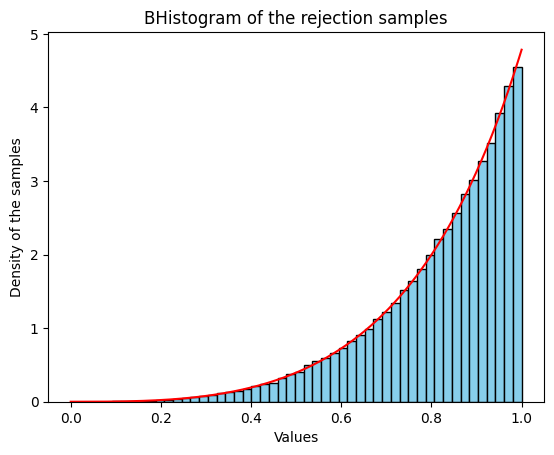

In [101]:
# ------------------------------------------------------------
# Problem 1.2
# Produce samples and plot histogram together with the true density
# ------------------------------------------------------------
n_samples = 100000
problem1_samples = problem1_rejection(n_samples)

# Plotting a basic histogram
plt.hist(problem1_samples, bins=50, density=True, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density of the samples')
plt.title('BHistogram of the rejection samples')

x_values = np.linspace(0, 1, 500)
fx = (2*x_values*(np.exp(x_values**2) - 1) / (np.e - 2))

plt.plot(x_values, fx, color='r', label='True fx')

# Display the plot
plt.show()

3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2(e^{x^2}-1) x}{e-2} dx
$$
and store the result in `problem1_integral`.


-----
### Monte Carlo approximation of the integral

We want to approximate the integral
$$
\int_0^{1} \sin(x)\,\frac{2(e^{x^2}-1)x}{e-2}\,dx.
$$

---

### Key observation

From the earlier parts of the exercise, we have already constructed samples
$$
X_1, X_2, \dots, X_n
$$
using rejection sampling such that each $(X_i)$ is distributed according to the density
$$
f(x) = \frac{2(e^{x^2}-1)x}{e-2}, \quad x \in [0,1].
$$

This is crucial, because the integral we want to compute can be written as an **expectation with respect to this density**:
$$
\int_0^1 \sin(x)\,f(x)\,dx
= \mathbb{E}_{X \sim f}[\sin(X)].
$$

---

### Monte Carlo principle

For a random variable $(X \sim f)$, the expectation
$$
\mathbb{E}_{X \sim f}[\sin(X)]
$$
can be approximated using Monte Carlo integration by
$$
\frac{1}{n}\sum_{i=1}^n \sin(X_i),
$$
where $(X_1,\dots,X_n)$ are independent samples drawn from $(f)$.

---

### Why we do **not** multiply by $(f(x))$ again

A common mistake is to compute
$$
\sin(X_i)\,f(X_i),
$$
but this would be incorrect here. The reason is that the **sampling distribution is already $(f(x))$**.

- If we were sampling from a *different* distribution (for example Uniform $((0,1)))$, then we would need to include importance weights.
- In this problem, we are sampling **directly from the density appearing in the integral**, so the density is already accounted for by how the samples were generated.

Multiplying by $(f(x))$ again would effectively weight the density twice and approximate the wrong quantity.

---

### Final Monte Carlo estimator

Therefore, the correct Monte Carlo approximation of the integral is simply:
$$
\int_0^1 \sin(x)\,f(x)\,dx
\;\approx\;
\frac{1}{n}\sum_{i=1}^n \sin(X_i),
$$

which in code corresponds to:
```python
np.mean(np.sin(problem1_samples))
```
-----

In [102]:
# ------------------------------------------------------------
# Problem 1.3
# Monte Carlo approximation of the integral using problem1_samples
# ------------------------------------------------------------
x = problem1_samples
print("Length of x is: ", len(x))

problem1_integral = np.mean(np.sin(x))

print("Monte Carlo approximation of the integral:", problem1_integral)


Length of x is:  100000
Monte Carlo approximation of the integral: 0.7227319166139874


4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`


-----

## Hoeffding confidence interval (Problem 1.4)

To quantify the uncertainty of the Monte Carlo estimate of the integral, Hoeffding’s inequality is used.

Let
$$
Y_i = \sin(X_i),
$$
where $X_i$ are the samples drawn from the distribution on $[0,1]$. The Monte Carlo estimator of the integral is
$$
\widehat{I}_n = \frac{1}{n}\sum_{i=1}^n Y_i.
$$

Since $X_i \in [0,1]$ and the function $\sin(x)$ is increasing on this interval, the random variables $Y_i$ are bounded by
$$
0 \le Y_i \le \sin(1).
$$
Thus we may choose
$$
a = 0, \qquad b = \sin(1).
$$

Hoeffding’s inequality states that for i.i.d. random variables $Y_i \in [a,b]$,
$$
\mathbb{P}\!\left(\left|\widehat{I}_n - \mathbb{E}[Y]\right| \ge \varepsilon\right)
\le 2 \exp\!\left(-\frac{2n\varepsilon^2}{(b-a)^2}\right).
$$

To construct a two-sided $95\%$ confidence interval, we set the right-hand side equal to $\delta = 0.05$:
$$
2 \exp\!\left(-\frac{2n\varepsilon^2}{(b-a)^2}\right) = 0.05.
$$
Solving for $\varepsilon$ gives
$$
\varepsilon
= (b-a)\sqrt{\frac{\ln(2/\delta)}{2n}}
= (b-a)\sqrt{\frac{\ln(40)}{2n}}.
$$

The resulting $95\%$ confidence interval for the integral is therefore
$$
\left[\widehat{I}_n - \varepsilon,\; \widehat{I}_n + \varepsilon\right].
$$


-----

In [103]:
# ------------------------------------------------------------
# Problem 1.4
# 95% confidence interval using Hoeffding's inequality
# Store as a tuple in problem1_interval
# ------------------------------------------------------------

a = 0
b = np.sin(1.0)

# This is the number of samples we used for the previous exercise, which will be our n in the Hoeffding inequality
n_samples = 100000
epsilon = (b-a)*np.sqrt((np.log(0.05/2) / (-2*n_samples)))

lower_bound = problem1_integral - epsilon
upper_bound = problem1_integral + epsilon

problem1_interval = (lower_bound, upper_bound)
print("This is the interval for the Hoeffding Inequality: ", problem1_interval)


This is the interval for the Hoeffding Inequality:  (np.float64(0.7191180561541235), np.float64(0.7263457770738513))


5. [4p] Fill in the remaining part of the function `problem1_rejection_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

-----
## Step-by-step solution for Problem 1.5 using the transformation $Y=\frac{1}{X}$

We want to sample from the distribution with CDF
$$
F_X(x)=
\begin{cases}
0, & x\le 0\\[4pt]
20x e^{20-1/x}, & 0<x<\frac{1}{20}\\[4pt]
1, & x\ge \frac{1}{20}.
\end{cases}
$$
The hard part is that the distribution is *very concentrated* near $x=\frac{1}{20}$, so a naive proposal like $\text{Uniform}(0,1/20)$ leads to many rejections.

---

## 1) Differentiate the CDF to get the PDF $f_X(x)$

For $0<x<\frac{1}{20}$:
$$
F_X(x) = 20x e^{20-1/x}.
$$
Differentiate using product rule:
$$
f_X(x)=\frac{d}{dx}\left(20x e^{20-1/x}\right)
=20 e^{20-1/x} + 20x\frac{d}{dx}\left(e^{20-1/x}\right).
$$
Chain rule:
$$
\frac{d}{dx}\left(e^{20-1/x}\right)=e^{20-1/x}\cdot \frac{d}{dx}(20-1/x).
$$
Since
$$
\frac{d}{dx}(-1/x)=\frac{1}{x^2},
$$
we get
$$
\frac{d}{dx}(20-1/x)=\frac{1}{x^2}.
$$
So:
$$
f_X(x)=20 e^{20-1/x}+20x\cdot e^{20-1/x}\cdot \frac{1}{x^2}
=20 e^{20-1/x}\left(1+\frac{1}{x}\right),
\quad 0<x<\frac{1}{20}.
$$

---

## 2) The key trick: transform $Y=\frac{1}{X}$

The expression contains $1/x$, so we remove that “bad” term by defining:
$$
Y=\frac{1}{X}.
$$

### Support after the transform
If $0<X<\frac{1}{20}$ then
$$
Y=\frac{1}{X} > 20.
$$
So $Y\in(20,\infty)$.

---

## 3) Why the absolute value in the formula appears

When you change variables, densities must stay nonnegative and probabilities must be preserved. The rule is:
$$
f_Y(y)=f_X(x)\left|\frac{dx}{dy}\right|
\quad \text{where } x=h(y).
$$

### What does the “absolute value sign” mean?
The symbol
$$
\left|\frac{dx}{dy}\right|
$$
means “take the derivative $\frac{dx}{dy}$ and then take its absolute value”.

Why? Because $\frac{dx}{dy}$ can be negative (as it is here), but a density must be nonnegative, so we use the absolute value (this is the 1D version of the Jacobian determinant).

---

## 4) Compute $\left|\frac{dx}{dy}\right|$

We have:
$$
y=\frac{1}{x}
\quad\Longleftrightarrow\quad
x=\frac{1}{y}.
$$
Differentiate:
$$
\frac{dx}{dy} = \frac{d}{dy}\left(\frac{1}{y}\right)=-\frac{1}{y^2}.
$$
Therefore:
$$
\left|\frac{dx}{dy}\right|=\left|-\frac{1}{y^2}\right|=\frac{1}{y^2}.
$$

This is exactly what your picture shows:
$$
f_Y(y)=f_X(1/y)\cdot \frac{1}{y^2}.
$$

---

## 5) Compute the density $f_Y(y)$

Start from:
$$
f_Y(y)=f_X(1/y)\cdot \frac{1}{y^2}.
$$

We already have:
$$
f_X(x)=20 e^{20-1/x}\left(1+\frac{1}{x}\right).
$$

Substitute $x=\frac{1}{y}$:
- $e^{20-1/x} \to e^{20-y}$
- $\left(1+\frac{1}{x}\right)\to (1+y)$

So:
$$
f_X(1/y)=20 e^{20-y}(1+y).
$$
Thus:
$$
f_Y(y)=20 e^{20-y}(1+y)\cdot \frac{1}{y^2},
\quad y>20.
$$

---

## 6) Choose a fast proposal distribution for $Y$

Notice $f_Y(y)$ contains the factor $e^{20-y}$, which is the same shape as an exponential tail.

Choose the proposal:
$$
g_Y(y)=e^{-(y-20)}, \quad y\ge 20,
$$
which is the density of:
$$
Y = 20 + Z,\quad Z\sim \text{Exp}(1).
$$

This proposal is easy to sample and matches the important exponential decay of the target.

---

## 7) Compute the rejection ratio and the constant $M$

Compute:
$$
\frac{f_Y(y)}{g_Y(y)}
=
\frac{20 e^{20-y}(1+y)/y^2}{e^{-(y-20)}}.
$$
But
$$
e^{-(y-20)} = e^{20-y},
$$
so the exponentials cancel perfectly:
$$
\frac{f_Y(y)}{g_Y(y)} = 20\frac{1+y}{y^2}.
$$

We need a constant $M$ such that
$$
\frac{f_Y(y)}{g_Y(y)}\le M \quad \text{for all } y\ge 20.
$$

For $y\ge 20$, the function $20(1+y)/y^2$ is decreasing, so the maximum is at $y=20$:
$$
M=20\frac{1+20}{20^2} = 20\cdot\frac{21}{400}=\frac{420}{400}=1.05.
$$

So the acceptance probability is:
$$
\alpha(y)=\frac{f_Y(y)}{M g_Y(y)}
=\frac{20(1+y)/y^2}{1.05}.
$$

This is close to 1 near $y=20$, so rejection is rare (fast).

---

## 8) Convert accepted $Y$ back to $X$

If a proposed $y$ is accepted, set:
$$
x=\frac{1}{y}.
$$
Those $x$ values are samples from the original target distribution.

---

## Summary of the algorithm
1. Propose $y = 20 + \text{Exp}(1)$.
2. Accept with probability $\alpha(y)=\dfrac{20(1+y)/y^2}{1.05}$.
3. If accepted, output $x=1/y$.
4. Repeat until you have $n$ samples.

This method is fast because the proposal matches the exponential shape of the target in the transformed variable.

-----

In [104]:
import numpy as np

def problem1_rejection_2(n_samples):
    """
    Rejection sampling for the distribution with CDF

        F(x) = 20 x e^{20 - 1/x},   0 < x < 1/20

    Strategy (high level):
    ----------------------
    1) The target density is extremely concentrated near x = 1/20.
       Sampling uniformly on (0, 1/20) would cause many rejections.

    2) Introduce the change of variables Y = 1 / X.
       This moves the support to Y > 20 and turns the difficult term
       e^{20 - 1/x} into a simple exponential decay e^{20 - y}.

    3) Sample Y from a shifted exponential distribution:
           Y = 20 + Z,  where Z ~ Exp(1)

    4) Use rejection sampling in the Y–space with a small rejection
       constant M = 1.05.

    5) Convert accepted Y values back to X by X = 1 / Y.
    """

    samples = []           # will store accepted X samples
    M = 1.05               # rejection constant (tight upper bound)

    while len(samples) < n_samples:

        # ------------------------------------------------------------
        # Step 1: Propose a value Y from the proposal distribution g_Y
        #         g_Y(y) = exp(-(y - 20)),  y >= 20
        #
        #         This is equivalent to:
        #             Y = 20 + Z,  Z ~ Exp(1)
        # ------------------------------------------------------------
        y = 20.0 + np.random.exponential(scale=1.0)

        # ------------------------------------------------------------
        # Step 2: Compute the acceptance probability
        #
        # From the derivation:
        #     f_Y(y) / g_Y(y) = 20 * (1 + y) / y^2
        #
        # The acceptance probability is:
        #     alpha(y) = f_Y(y) / (M * g_Y(y))
        # ------------------------------------------------------------
        accept_prob = (20.0 * (1.0 + y) / (y * y)) / M

        # ------------------------------------------------------------
        # Step 3: Accept or reject the proposal
        #
        # Draw U ~ Uniform(0,1). If U <= alpha(y), accept Y.
        # ------------------------------------------------------------
        u = np.random.uniform(0.0, 1.0)

        if u <= accept_prob:
            # --------------------------------------------------------
            # Step 4: Convert back to X
            #
            # Recall the transformation:
            #     Y = 1 / X   ->   X = 1 / Y
            #
            # This X now follows the original target distribution.
            # --------------------------------------------------------
            x = 1.0 / y
            samples.append(x)

    # Return the samples as a NumPy array
    return np.array(samples)
  
# test = problem1_rejection_2(100000)


So I tried many different distributions for g(x), but this is as close as I get to 2 seconds. I tried uniform, exponential and beta and beta seems to be the best. I tried with many different values for a and b, but I never get lower than roughly 4,5 seconds. 

---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [105]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_rejection(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_integral, float)) 
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_rejection_2(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_rejection_2")
else:
    print("Good, your problem1_rejection_2 returns a numpy array")

Good, your problem1_rejection returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Good, your problem1_rejection_2 returns a numpy array


---
## Exam vB, PROBLEM 2
Maximum Points = 14


In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.
2. [4p] A page loads in $\text{Exp}(3)$ (Exponentially distributed with mean $1/3$) seconds if not preloaded and loads with $\text{Exp}(20)$ (Exponentially distributed with mean $1/20$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $8$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.
3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).
4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to the stationary distribution. 

-----

In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.
-----

### How the transition-count loop works (4×4 example summary)

Assume we have a website with **4 pages**, labeled $0, 1, 2, 3$.  
We therefore construct a **$4 \times 4$ transition-count matrix** called `counts`, initialized with zeros:

$$
\begin{aligned}
\text{counts} &= 
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
\end{aligned}
$$

Each row in the dataset corresponds to **one observed transition** from a *source page* to a *destination page*.

The loop

```python
for _, row in data.iterrows():
    i = int(row["source"])
    j = int(row["destination"])
    counts[i, j] += 1
```

works as follows:

- The loop iterates through the dataset **row by row**
- For each row:
  - $i$ is the current page (value in `source`)
  - $j$ is the next page (value in `destination`)
  - The matrix entry `counts[i, j]` is increased by $1$

This means:
- **Rows** represent the current page
- **Columns** represent the next page
- `counts[i, j]` stores how many times the transition $i \rightarrow j$ was observed

### Example

Suppose the dataset contains the following transitions:

$1 \rightarrow 3$  
$1 \rightarrow 2$  
$3 \rightarrow 2$  
$1 \rightarrow 3$

After processing all rows, the count matrix becomes:

$$
\text{counts} =
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 1 & 2 \\
0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$

This tells us:
- From page $1$, users moved to page $2$ once and to page $3$ twice
- From page $3$, users moved to page $2$ once

This count matrix is then **row-normalized** to obtain the **maximum likelihood estimate of the Markov transition matrix**, where each row represents a probability distribution over the next page given the current page.


In [106]:
import numpy as np
import pandas as pd

# ------------------------------------------------------------
# Part 1: Maximum Likelihood Estimation of a Markov chain
# ------------------------------------------------------------
# We model user navigation on a website as a homogeneous Markov chain.
# Each page is a state, and each row in the dataset corresponds to
# one observed transition from a source page to a destination page.
# ------------------------------------------------------------


# ------------------------------------------------------------
# 1) Load the dataset
# ------------------------------------------------------------
# The CSV file contains three columns:
#   - user        : user identifier (NOT used in the Markov model)
#   - source      : page the user is currently on
#   - destination : page the user clicks next
#
# Each row corresponds to exactly ONE observed transition:
#     source -> destination
#
# Since the Markov chain is assumed to be homogeneous, the transition
# probabilities depend ONLY on the current page, not on the user.
# Therefore, we completely ignore the "user" column.
data = pd.read_csv("data/websites.csv")


# ------------------------------------------------------------
# 2) Determine how many states (pages) exist
# ------------------------------------------------------------
# Pages are labeled as integers: 0, 1, 2, ...
#
# If the largest page ID appearing in the data is M,
# then the total number of states is M + 1.
#
# We must check BOTH the "source" and "destination" columns:
# - A page might appear only as a destination and still be a valid state.
max_page_id = max(data["source"].max(), data["destination"].max())
problem2_n_states = int(max_page_id + 1)

# This tells us the size of the transition matrix:
# problem2_n_states x problem2_n_states
print("This is the problem2_n_states: ", problem2_n_states)


# ------------------------------------------------------------
# 3) Create a transition count matrix
# ------------------------------------------------------------
# counts[i, j] will store how many times we observed a transition:
#     page i  ->  page j
#
# Initially, we set all counts to zero.
counts = np.zeros((problem2_n_states, problem2_n_states), dtype=float)


# ------------------------------------------------------------
# 4) Count transitions from the dataset
# ------------------------------------------------------------
# We loop through each row of the dataset.
# For each observed transition:
#   - i = source page
#   - j = destination page
# we increment counts[i, j] by 1.
#
# After this loop, counts[i, j] equals the total number of times
# users moved from page i to page j in the data.
for _, row in data.iterrows():
    i = int(row["source"])        # current page (state i)
    j = int(row["destination"])   # next page (state j)
    counts[i, j] += 1             # record one observed transition i -> j

# Display the raw transition counts
print("Counts: \n", counts)


# ------------------------------------------------------------
# 5) Convert counts to transition probabilities (MLE)
# ------------------------------------------------------------
# For a Markov chain, the maximum likelihood estimator (MLE) is:
#
#   P_hat[i, j] = counts[i, j] / sum_j counts[i, j]
#
# That is:
# - Each row is normalized so it sums to 1
# - Each row becomes a probability distribution over next pages
#
# IMPORTANT EDGE CASE:
# If a page i never appears as a source in the dataset, then
#   sum_j counts[i, j] = 0
# In that case, division by zero is impossible.
# We handle this by leaving that entire row as zeros.
problem2_transition_matrix = np.zeros_like(counts)

for i in range(problem2_n_states):
    # Total number of observed outgoing transitions from page i
    row_sum = counts[i].sum()

    if row_sum > 0:
        # Normalize the row so probabilities sum to 1
        problem2_transition_matrix[i, :] = counts[i, :] / row_sum
    else:
        # No observed transitions leaving page i
        # We leave the row as all zeros
        problem2_transition_matrix[i, :] = 0.0

# Print the estimated transition matrix
print("This is the correct transition matrix with correct probabilities: \n",
      problem2_transition_matrix)


# ------------------------------------------------------------
# (Optional) 6) Sanity check
# ------------------------------------------------------------
# For a valid transition matrix:
# - Rows with outgoing transitions should sum to 1
# - Rows with no outgoing transitions should sum to 0
#
# This line ONLY computes the row sums; it does not change anything.
# Uncomment it if you want to verify correctness.
# print(problem2_transition_matrix.sum(axis=1))


This is the problem2_n_states:  10
Counts: 
 [[ 0. 22.  0. 10.  4.  1.  7.  9. 13. 17.]
 [13.  0. 12. 27.  2. 30. 16. 18.  4.  6.]
 [19. 12.  0. 11. 14. 16.  2.  0.  4. 14.]
 [ 1. 10. 21.  0.  8.  7. 15. 21.  0. 23.]
 [13. 12.  8. 10.  0.  7. 12.  4.  2.  4.]
 [ 1. 19.  3.  6. 16.  0. 16.  2. 18. 21.]
 [ 4.  7. 20.  9.  0. 16.  0. 16. 27. 16.]
 [15.  5.  1. 12.  8.  3. 20.  0. 16. 13.]
 [12. 10. 12.  4.  6. 14.  7.  8.  0. 11.]
 [ 4. 31. 15. 17. 14.  8. 20. 15.  0.  0.]]
This is the correct transition matrix with correct probabilities: 
 [[0.         0.26506024 0.         0.12048193 0.04819277 0.01204819
  0.08433735 0.10843373 0.15662651 0.20481928]
 [0.1015625  0.         0.09375    0.2109375  0.015625   0.234375
  0.125      0.140625   0.03125    0.046875  ]
 [0.20652174 0.13043478 0.         0.11956522 0.15217391 0.17391304
  0.02173913 0.         0.04347826 0.15217391]
 [0.00943396 0.09433962 0.19811321 0.         0.0754717  0.06603774
  0.14150943 0.19811321 0.         0.21698113

2. [4p] A page loads in $\text{Exp}(3)$ (Exponentially distributed with mean $1/3$) seconds if not preloaded and loads with $\text{Exp}(20)$ (Exponentially distributed with mean $1/20$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $8$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.


I ASSUME: It says "Given that we start in page $8$ simulate $10000$ load times from page $1$ (that is, only a single step)", so I think that there has been a typo. I will assume that we start from page and take one step from page 8

## Part 2 — Simulate page load times with preloading (one-step from page 8)

### Given (from the problem)
- We start at page (state) **8**.
- We simulate **one single step** of the Markov chain (i.e., we only care about the next page).
- If the next page is **not preloaded**, load time $\sim \mathrm{Exp}(3)$, mean $1/3$ seconds.
- If the next page **is preloaded**, load time $\sim \mathrm{Exp}(20)$, mean $1/20$ seconds.
- We simulate **10,000** load times.
- We do two experiments:
  1. Preload the **single most likely** next page (top-1).
  2. Preload the **two most likely** next pages (top-2).

---

## Step 1) Identify the transition probabilities from page 8
Let $\hat P$ be the estimated transition matrix from Part 1.

The one-step transition probabilities from page 8 are the **row 8** of $\hat P$:
$$
p_j = P(X_{t+1}=j \mid X_t=8) = \hat P_{8j}.
$$
In code, this is:
- `p_next = problem2_transition_matrix[8, :]`

This probability vector is used to sample which next page each user visits.

---

## Step 2) Find which pages to preload (top-1 and top-2)
From the probability vector `p_next`, we sort pages by probability (largest first):
- **Top-1 page** = the index with the largest probability in `p_next`
- **Top-2 pages** = the two indices with the largest probabilities in `p_next`

In code, this is typically done with:
- `sorted_pages = np.argsort(p_next)[::-1]`
- `top1_page = sorted_pages[0]`
- `top2_pages = sorted_pages[:2]`

These are the pages we assume we will preload.

---

## Step 3) Simulate the next page for each of 10,000 users
For each user, we sample exactly one next page:
$$
X_{t+1} \sim \text{Categorical}(p_0,\ldots,p_{n-1}).
$$
In NumPy, this is:
- `next_pages = np.random.choice(problem2_n_states, size=10000, p=p_next)`

This produces an array `next_pages` of length 10,000 with the realized next page for each user.

---

## Step 4) Convert “preloaded or not” into load times
### Load time distributions
- Not preloaded: $\mathrm{Exp}(3)$ has mean $1/3$
- Preloaded: $\mathrm{Exp}(20)$ has mean $1/20$

Important NumPy detail:
- `np.random.exponential(scale=...)` uses `scale = mean`.

So we generate load times using:
- not preloaded: `np.random.exponential(scale=1/3, size=10000)`
- preloaded: `np.random.exponential(scale=1/20, size=10000)`

Then we pick the correct time per user using a boolean mask and `np.where(...)`.

---

## Step 5) Experiment A — preload only the most likely next page (top-1)
1. Sample `next_pages_top` from `p_next`.
2. Mark preloaded users:
   - `is_preloaded_top = (next_pages_top == top1_page)`
3. Generate load times (fast and slow).
4. Combine them:
   - If `is_preloaded_top[i]` is True, user i gets a fast time (Exp(20))
   - Otherwise, user i gets a slow time (Exp(3))

Store the resulting 10,000 simulated times in:
- `problem2_page_load_times_top`

---

## Step 6) Experiment B — preload the two most likely pages (top-2)
1. Sample `next_pages_two` from `p_next` (new independent simulation).
2. Mark preloaded users:
   - `is_preloaded_two = np.isin(next_pages_two, top2_pages)`
3. Generate load times (fast and slow) again.
4. Combine them with `np.where(...)`.

Store the resulting 10,000 simulated times in:
- `problem2_page_load_times_two`

---

## What you should end up with
- `problem2_page_load_times_top`: NumPy array of length 10,000 (top-1 preloading)
- `problem2_page_load_times_two`: NumPy array of length 10,000 (top-2 preloading)

Each array contains simulated one-step load times starting from page 8 under the given preloading strategy.


In [107]:
import numpy as np

# ------------------------------------------------------------
# Part 2: Simulate page load times for ONE STEP starting from page 8
# ------------------------------------------------------------
# We do exactly ONE Markov transition:
#   1) We start at a fixed page: current_page = 8
#   2) We sample the next page using the estimated transition probabilities:
#        next_page ~ Categorical( problem2_transition_matrix[8, :] )
#
# Then we simulate the *load time* for that next page depending on whether it was preloaded:
# - If the realized next page IS preloaded:
#       load time ~ Exp(20)  -> mean = 1/20 seconds (fast)
# - If the realized next page is NOT preloaded:
#       load time ~ Exp(3)   -> mean = 1/3 seconds (slow)
#
# IMPORTANT NUMPY NOTE:
# np.random.exponential(scale=...) uses "scale" = mean of the exponential distribution.
# So:
#   Exp(3)  (rate=3)  => mean = 1/3  => scale = 1/3
#   Exp(20) (rate=20) => mean = 1/20 => scale = 1/20
# ------------------------------------------------------------

# -----------------------------
# Settings
# -----------------------------
n_users = 10000          # We simulate 10,000 independent "users"/trials
current_page = 8         # We start from page 8 (0-indexed)

# Probability distribution over next pages given we are currently on page 8.
# This is the 8th row of the transition matrix:
#   p_next[j] = P(next_page = j | current_page = 8)
p_next = problem2_transition_matrix[current_page, :]

# -----------------------------
# Find the most likely next pages
# -----------------------------
# We want to know which next page(s) are most probable from page 8,
# because those are the ones we will preload.
#
# np.argsort(p_next) gives indices sorted from smallest prob to largest prob.
# Reversing [::-1] gives largest to smallest.
sorted_pages = np.argsort(p_next)[::-1]

top1_page = sorted_pages[0]      # single most likely next page from page 8
top2_pages = sorted_pages[:2]    # two most likely next pages from page 8

# -----------------------------
# 1) Preloading ONLY the most likely page (top-1)
# -----------------------------
# Experiment idea:
# - For each of the 10,000 trials:
#     * sample which next page happens (using p_next)
#     * if that next page equals top1_page => it was preloaded => faster Exp(20)
#     * otherwise => not preloaded => slower Exp(3)

# Sample next pages for 10,000 users using the categorical distribution p_next
next_pages_top = np.random.choice(
    problem2_n_states,   # possible page labels: 0, 1, ..., n_states-1
    size=n_users,        # number of independent samples
    p=p_next             # probability for each page
)

# Boolean array: True if the sampled next page is the one we preloaded (top-1), else False
is_preloaded_top = (next_pages_top == top1_page)

# Draw load times for BOTH cases (vectorized):
# - one array of "slow" times (not preloaded), Exp(3)
# - one array of "fast" times (preloaded), Exp(20)
#
# We draw n_users values for each, then select elementwise with np.where.
load_times_not_preloaded = np.random.exponential(scale=1/3, size=n_users)   # Exp(3)
load_times_preloaded     = np.random.exponential(scale=1/20, size=n_users)  # Exp(20)

# For each user:
# - if preloaded -> take the fast sample
# - else         -> take the slow sample
problem2_page_load_times_top = np.where(
    is_preloaded_top,
    load_times_preloaded,
    load_times_not_preloaded
)

# -----------------------------
# 2) Preloading the TWO most likely pages (top-2)
# -----------------------------
# Same idea, but now we preload TWO pages: the two largest-probability destinations.
# A trial is "preloaded" if its sampled next page is in top2_pages.

# Sample next pages again for a new independent experiment
next_pages_two = np.random.choice(
    problem2_n_states,
    size=n_users,
    p=p_next
)

# Boolean array: True if the next page is either of the two preloaded pages
is_preloaded_two = np.isin(next_pages_two, top2_pages)

# Draw load times again (fresh samples for this second experiment)
load_times_not_preloaded = np.random.exponential(scale=1/3, size=n_users)   # Exp(3)
load_times_preloaded     = np.random.exponential(scale=1/20, size=n_users)  # Exp(20)

# Select fast vs slow times depending on whether the realized page was preloaded
problem2_page_load_times_two = np.where(
    is_preloaded_two,
    load_times_preloaded,
    load_times_not_preloaded
)

# -----------------------------
# Optional sanity-check outputs
# -----------------------------
# These prints are just to help you see what the code is doing.
# They are not required unless the assignment asks for output.
print("Start page:", current_page)
print("Top-1 preloaded page:", top1_page)
print("Top-2 preloaded pages:", top2_pages)
print("Mean load time (top-1 preloaded):", problem2_page_load_times_top.mean())
print("Mean load time (top-2 preloaded):", problem2_page_load_times_two.mean())


Start page: 8
Top-1 preloaded page: 5
Top-2 preloaded pages: [5 2]
Mean load time (top-1 preloaded): 0.29116538583137913
Mean load time (top-2 preloaded): 0.24347995944240455


3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).



## Part 3 — Comparison of average load times

### 1) Average load time without preloading
If no page is preloaded, the load time always follows an exponential distribution
$\mathrm{Exp}(3)$.

For an exponential distribution with rate $\lambda$, the expected value is:
$$
\mathbb{E}[T] = \frac{1}{\lambda}.
$$

Therefore, the true expected load time without preloading is:
$$
\mathbb{E}[T_{\text{no preload}}] = \frac{1}{3}.
$$

---

### 2) Empirical average load time with top-1 preloading
From Part 2, we simulated load times when preloading the most likely next page.
These simulated values are stored in the variable:

`problem2_page_load_times_top`

The empirical average load time is computed as the sample mean of this array.

---

### 3) Comparison and conclusion
To answer the question  
“Is the average load time without preloading larger than the average load time with top-1 preloading?”  

we compare:
$$
\frac{1}{3} \quad \text{with} \quad \overline{T}_{\text{top-1}}.
$$

If the empirical mean load time with top-1 preloading is smaller than $1/3$,
then preloading improves the average load time.

Since preloading increases the probability that the fast distribution
$\mathrm{Exp}(20)$ (mean $1/20$) is used instead of $\mathrm{Exp}(3)$,
the average load time is reduced. Therefore, preloading the most likely next page
leads to an improvement in load time.


In [108]:
# Part 3: 3 points

import numpy as np

# True expected load time with NO preloading:
# load time ~ Exp(3) => mean = 1/3
problem2_avg = 1/3  # A float

# Compare to the empirical mean from Part 2 (top-1 preloading)
problem2_comparison = problem2_avg > float(np.mean(problem2_page_load_times_top))  # True / False
problem2_comparison


True


## Free text answer

Put the explanation for **part 3** of how you made the decision about `problem2_comparison` below this line in this **cell**. In order to enter edit mode you can doubleclick this cell or select it and press enter.

I am assuming that problem2_page_load_times_top is used, not problem2_page_load_times_two.
But both are calculated above.
The average time time is simply the mean of the samples of time. It therefore becomes quite small: 0.2648629205627815 seconds
(Average load time for problem2_page_load_times_two:  0.21635340436426223)

But the average loading time wihout any pre-loading would become 1/3 seconds. This is because 1/3 is the mean of the distribution. So in theory, if we simulated with infinity and not 10000 and use no pre-loading, we would land at 1/3 seconds on average.


4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to the stationary distribution. 

## Part 4 — Stationary distribution and expected load time under stationarity

### Goal
1) Compute the stationary distribution $\pi$ of the Markov chain with transition matrix $\hat P$.
2) Use $\pi$ to compute the expected load time when we preload the **single most likely next page** from each current page.

---

## Step 1) Stationary distribution
A stationary distribution $\pi$ satisfies:
$$
\pi \hat P = \pi,
$$
meaning that if the current page is distributed as $\pi$, then the next page is also distributed as $\pi$.

Equivalently, $\pi^T$ is an eigenvector of $\hat P^T$ with eigenvalue $1$:
$$
\hat P^T \pi^T = 1 \cdot \pi^T.
$$
So we compute eigenvalues/eigenvectors of $\hat P^T$, pick the eigenvector whose eigenvalue is closest to $1$, take the real part (numerical routines may produce tiny imaginary parts), and normalize it so it sums to $1$.

---

## Step 2) Expected load time from a given page i (top-1 preloading)
From each page $i$, we preload the single most likely next page:
$$
j^*(i) = \arg\max_j \hat P_{ij}.
$$

Let:
$$
p_i = \hat P_{i, j^*(i)}
$$
be the probability that the realized next page is exactly the preloaded one.

Load times:
- Preloaded: $\mathrm{Exp}(20)$ with mean $1/20$
- Not preloaded: $\mathrm{Exp}(3)$ with mean $1/3$

So the conditional expected load time given current page $i$ is:
$$
\mathbb{E}[T \mid X_t=i] = \frac{1}{20} \, p_i + \frac{1}{3} (1 - p_i).
$$

---

## Step 3) Expected load time under the stationary distribution
Under stationarity, the current page equals $i$ with probability $\pi_i$. Therefore:
$$
\mathbb{E}[T] = \sum_i \pi_i \, \mathbb{E}[T \mid X_t=i].
$$

In code this is a dot product between the stationary distribution vector and the vector of conditional expected times.


In [109]:
# Part 4: 4 points

import numpy as np

# ------------------------------------------------------------
# Part 4.1: Stationary distribution via eigenvector of P^T
# ------------------------------------------------------------
# A stationary distribution pi satisfies:
#   pi P = pi
# Equivalently, pi^T is a right eigenvector of P^T with eigenvalue 1.
# ------------------------------------------------------------

P = problem2_transition_matrix
n = problem2_n_states

# Compute eigenvalues/eigenvectors of P^T
eigvals, eigvecs = np.linalg.eig(P.T)

# Find eigenvalue closest to 1
idx = np.argmin(np.abs(eigvals - 1.0))

# Corresponding eigenvector (take real part if complex due to numerical noise)
pi = np.real(eigvecs[:, idx])

# Fix arbitrary sign (eigenvectors can be multiplied by -1)
if pi.sum() < 0:
    pi = -pi

# Clamp tiny negatives from numerical noise, then normalize to sum to 1
pi = np.maximum(pi, 0.0)
pi = pi / pi.sum()

problem2_stationary_distribution = pi  # shape (n,)

# ------------------------------------------------------------
# Part 4.2: Expected load time under stationary distribution
# ------------------------------------------------------------
# From each current page i, we preload the single most likely next page.
# Let p_preloaded[i] be the probability that the next page is that preloaded page.
# Then:
#   E[T | i] = (1/20)*p_preloaded[i] + (1/3)*(1 - p_preloaded[i])
# ------------------------------------------------------------

# Most likely next page from each page i
top_next = np.argmax(P, axis=1)  # shape (n,)

# Probability that the next page equals the preloaded page
p_preloaded = P[np.arange(n), top_next]  # shape (n,)

# Conditional expected load time given current page i
expected_time_given_i = (1/20) * p_preloaded + (1/3) * (1 - p_preloaded)  # shape (n,)

# Expected load time under stationary distribution
problem2_avg_stationary = float(problem2_stationary_distribution @ expected_time_given_i)

# Optional prints for inspection
print("Stationary distribution:\n", problem2_stationary_distribution)
print("Stationary expected loading time:", problem2_avg_stationary)


Stationary distribution:
 [0.08212278 0.12810291 0.09219365 0.10612032 0.0721337  0.10215028
 0.11517528 0.09308925 0.08396098 0.12495085]
Stationary expected loading time: 0.27094210390432294


---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [110]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert isinstance(problem2_transition_matrix, np.ndarray)
except:
    print("Try again. your problem2_transition_matrix is not a numpy array")
else:
    print("Good, your problem2_transition_matrix is a numpy array")

try:
    assert isinstance(problem2_n_states, int)
except:
    print("Try again. your problem2_n_states is not an integer")
else:
    print("Good, your problem2_n_states is an integer")

try:
    assert problem2_transition_matrix.shape == (problem2_n_states, problem2_n_states)
except:
    print("Try again. your problem2_transition_matrix does not have the correct shape")
else:
    print("Good, your problem2_transition_matrix has the correct shape")

try:
    assert isinstance(problem2_page_load_times_top, np.ndarray), "problem2_page_load_times_top is not a numpy array"
    assert problem2_page_load_times_top.shape == (10000,), "problem2_page_load_times_top does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_page_load_times_top is a numpy array of shape (10000,)")

try:
    assert isinstance(problem2_page_load_times_two, np.ndarray), "problem2_page_load_times_two is not a numpy array"
    assert problem2_page_load_times_two.shape == (10000,), "problem2_page_load_times_two does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_page_load_times_two is a numpy array of shape (10000,)")

try:
    assert isinstance(problem2_avg, float), "problem2_avg is not a float"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_avg is a float")
try:
    assert isinstance(problem2_comparison, bool), "problem2_comparison is not a boolean"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_comparison is a boolean")
try:
    assert isinstance(problem2_stationary_distribution, np.ndarray), "problem2_stationary_distribution is not a numpy array"
    assert problem2_stationary_distribution.shape == (problem2_n_states,), "problem2_stationary_distribution does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_stationary_distribution is a numpy array of shape (problem2_n_states,)")
try:
    assert isinstance(problem2_avg_stationary, float), "problem2_avg_stationary is not a float"
except Exception as e:
    print(e)
else:
    print("Good, your problem2_avg_stationary is a float")

Good, your problem2_transition_matrix is a numpy array
Good, your problem2_n_states is an integer
Good, your problem2_transition_matrix has the correct shape
Good, your problem2_page_load_times_top is a numpy array of shape (10000,)
Good, your problem2_page_load_times_two is a numpy array of shape (10000,)
Good, your problem2_avg is a float
Good, your problem2_comparison is a boolean
Good, your problem2_stationary_distribution is a numpy array of shape (problem2_n_states,)
Good, your problem2_avg_stationary is a float


---
## Exam vB, PROBLEM 3
Maximum Points = 12


In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.
2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.
3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.
3. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.

-----
## Explanation of variables produced by `train_test_validation`

The function `train_test_validation(X, Y, shuffle=True, random_state=1)` splits the dataset into **three disjoint parts**: training, validation, and test data. Each part contains feature vectors and their corresponding labels.

### Training set
- **`PROBLEM3_X_train`**  
  Feature matrix for the **training set**.  
  Shape: $(n_{\text{train}}, d)$, where $d$ is the number of features.  
  Used to **fit (train)** the logistic regression model.

- **`PROBLEM3_y_train`**  
  Label vector for the **training set**.  
  Shape: $(n_{\text{train}},)$.  
  Contains the true class labels used during training.

### Validation set
- **`PROBLEM3_X_val`**  
  Feature matrix for the **validation set**.  
  Shape: $(n_{\text{val}}, d)$.  
  Used for **model selection**, in particular for choosing the decision threshold.

- **`PROBLEM3_y_val`**  
  Label vector for the **validation set**.  
  Shape: $(n_{\text{val}},)$.  
  Used to evaluate cost, precision, recall, and 0–1 loss when selecting thresholds.

- **`PROBLEM3_y_true_val`**  
  Same as `PROBLEM3_y_val`, stored under a clearer name to emphasize that these are the **true labels** for the validation set.

- **`PROBLEM3_y_pred_proba_val`**  
  Predicted probabilities $P(Y=1 \mid X)$ for the **validation set**, produced by the trained logistic regression model.  
  Used to:
  - compute cost as a function of the threshold,
  - find the optimal threshold,
  - compute precision and recall on validation data.

### Test set
- **`PROBLEM3_X_test`**  
  Feature matrix for the **test set**.  
  Shape: $(n_{\text{test}}, d)$.  
  Used **only for final evaluation**, after all thresholds and decisions are fixed.

- **`PROBLEM3_y_test`**  
  Label vector for the **test set**.  
  Shape: $(n_{\text{test}},)$.  
  Contains the true class labels for final evaluation.

- **`PROBLEM3_y_true_test`**  
  Same as `PROBLEM3_y_test`, emphasizing that these are the **true labels** for the test set.

- **`PROBLEM3_y_pred_proba_test`**  
  Predicted probabilities $P(Y=1 \mid X)$ for the **test set**.  
  Used to compute the final cost and construct a confidence interval.

### Summary
- **Training set**: used to learn model parameters  
- **Validation set**: used to choose thresholds and compare decision rules  
- **Test set**: used to estimate final performance and uncertainty  

This separation prevents information leakage and ensures an unbiased evaluation.


In [111]:

# RUN THIS CELL TO GET THE DATA

# We start by loading the data

import pandas as pd

PROBLEM3_DF = pd.read_csv('data/fraud.csv')
Y = PROBLEM3_DF['Class'].values
X = PROBLEM3_DF[['V%d' % i for i in range(1,5)]+['Amount']].values

# We will split the data into training, testing and validation sets
from Utils import train_test_validation
PROBLEM3_X_train, PROBLEM3_X_test, PROBLEM3_X_val, PROBLEM3_y_train, PROBLEM3_y_test, PROBLEM3_y_val = train_test_validation(X,Y,shuffle=True,random_state=1)

# From this we will train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(PROBLEM3_X_train,PROBLEM3_y_train)

# THE FOLLOWING CODE WILL PRODUCE THE ARRAYS YOU NEED FOR THE PROBLEM

PROBLEM3_y_pred_proba_val = lr.predict_proba(PROBLEM3_X_val)[:,1]
PROBLEM3_y_true_val = PROBLEM3_y_val

PROBLEM3_y_pred_proba_test = lr.predict_proba(PROBLEM3_X_test)[:,1]
PROBLEM3_y_true_test = PROBLEM3_y_test

-----
In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.
-----

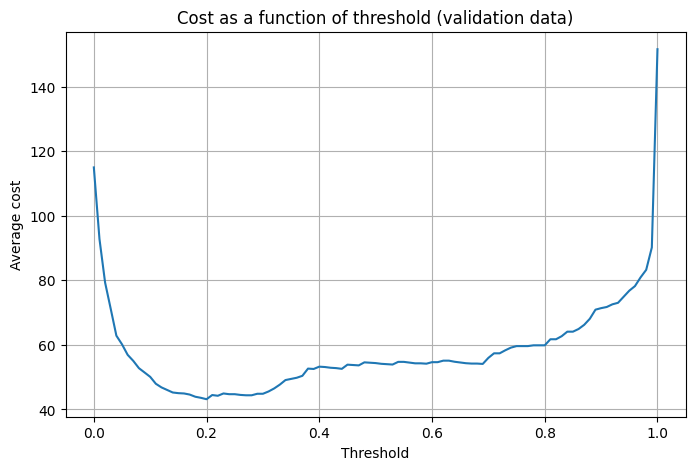

In [112]:
# Part 1: 3 points

# Implement the following function that calculates the cost of a binary classifier
# according to the specification in the problem statement.
# The function evaluates how expensive a given threshold choice is.
def cost(y_true, y_predict_proba, threshold):
    # y_true: numpy array of shape (n_samples,)
    #         Contains the true binary labels (0 = legitimate, 1 = fraud)
    #
    # y_predict_proba: numpy array of shape (n_samples,)
    #                  Contains predicted probabilities of fraud
    #
    # threshold: float in [0, 1]
    #            Probabilities >= threshold are classified as fraud (1),
    #            otherwise as legitimate (0)

    # Convert predicted probabilities into binary predictions
    # Fraud (1) if probability >= threshold, otherwise legitimate (0)
    y_pred = (y_predict_proba >= threshold).astype(int)
    
    
    # Compute confusion matrix components by counting outcomes
    # True Positives: fraud correctly detected
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    # True Negatives: legitimate transactions correctly allowed
    TN = np.sum((y_true == 0) & (y_pred == 0))
    
    # False Positives: legitimate transactions incorrectly blocked
    FP = np.sum((y_true == 0) & (y_pred == 1))
    
    # False Negatives: fraud that was missed
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    # Compute the total cost according to the problem specification
    # TP  -> cost 100
    # TN  -> cost 0
    # FP  -> cost 120
    # FN  -> cost 600
    total_cost = (
        100 * TP +     # Cost for detecting fraud (manual review, etc.)
        0   * TN +     # No cost for correct legitimate transactions
        120 * FP +     # Cost for wrongly blocking legitimate users
        600 * FN       # High cost for missed fraud
    )
    
    # Compute the average cost per sample
    # This makes the cost comparable across datasets of different sizes
    avg_cost = total_cost / len(y_true)
    
    return avg_cost


# ------------------------------------------------------------
# Plot the cost as a function of the threshold
# using validation data
# ------------------------------------------------------------

# Create thresholds from 0 to 1 (inclusive) with step size 0.01
thresholds = np.arange(0, 1.01, 0.01)

# Compute the average cost for each threshold value
# using the validation labels and predicted probabilities
costs = [
    cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t)
    for t in thresholds
]

# Plot cost vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, costs)
plt.xlabel("Threshold")
plt.ylabel("Average cost")
plt.title("Cost as a function of threshold (validation data)")
plt.grid(True)
plt.show()


2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.


In [113]:
import numpy as np

# ----------------------------
# Part 2: Find best threshold (min cost) on validation set
# ----------------------------

# 1) Define candidate thresholds from 0 to 1 with step size 0.01
# These are the thresholds we will evaluate
thresholds = np.arange(0, 1.01, 0.01)

# 2) Compute the average cost for each threshold
# Uses the cost() function implemented in Part 1
costs = np.array([
    cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t)
    for t in thresholds
])

# 3) Find the index of the threshold that minimizes the cost
min_idx = np.argmin(costs)

# Extract the optimal threshold as a float
problem3_threshold = float(thresholds[min_idx])  # Value in [0, 1]

# 4) Compute the cost at the optimal threshold on the validation data
problem3_cost_val = float(
    cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, problem3_threshold)
)

# 5) Generate binary predictions on the validation set
# using the optimal threshold
problem3_y_pred_val = (PROBLEM3_y_pred_proba_val >= problem3_threshold).astype(int)

# ----------------------------
# Precision & Recall for class 1 and class 0
# Computed explicitly from confusion-matrix counts
# ----------------------------

# Compute confusion matrix components
TP = np.sum((PROBLEM3_y_true_val == 1) & (problem3_y_pred_val == 1))  # Fraud correctly detected
TN = np.sum((PROBLEM3_y_true_val == 0) & (problem3_y_pred_val == 0))  # Legit correctly allowed
FP = np.sum((PROBLEM3_y_true_val == 0) & (problem3_y_pred_val == 1))  # Legit incorrectly blocked
FN = np.sum((PROBLEM3_y_true_val == 1) & (problem3_y_pred_val == 0))  # Fraud missed

# ----------------------------
# Metrics for class 1 (fraud)
# ----------------------------

# Precision: fraction of predicted fraud that is actually fraud
problem3_precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0.0

# Recall: fraction of actual fraud that is detected
problem3_recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0.0

# ----------------------------
# Metrics for class 0 (legitimate)
# ----------------------------

# Precision: fraction of predicted legitimate that is actually legitimate
problem3_precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0.0

# Recall: fraction of actual legitimate that is correctly allowed
problem3_recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0.0


# ----------------------------
# Print results
# ----------------------------

print("Optimal threshold (min cost):", problem3_threshold)
print("Validation cost at optimal threshold:", problem3_cost_val)

print("Class 1 (fraud) precision:", problem3_precision_1)
print("Class 1 (fraud) recall:", problem3_recall_1)

print("Class 0 (legitimate) precision:", problem3_precision_0)
print("Class 0 (legitimate) recall:", problem3_recall_0)


Optimal threshold (min cost): 0.2
Validation cost at optimal threshold: 43.15492957746479
Class 1 (fraud) precision: 0.7961165048543689
Class 1 (fraud) recall: 0.9144981412639405
Class 0 (legitimate) precision: 0.9695767195767195
Class 0 (legitimate) recall: 0.9208542713567839


-----
3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.
-----

In [114]:
import numpy as np

# ----------------------------
# Part 3: Threshold minimizing 0–1 loss (validation set)
# ----------------------------

# 1) Define candidate thresholds from 0 to 1 with step size 0.01
# These thresholds will be evaluated using the 0–1 loss criterion
thresholds = np.arange(0, 1.01, 0.01)

# 2) Compute the 0–1 loss for each threshold
# 0–1 loss is defined as the fraction of incorrect predictions:
#
#   0–1 loss = (1 / n) * sum( I(y_pred != y_true) )
#
# where I(.) is an indicator that equals 1 if the condition is true
# and 0 otherwise.
#
# In NumPy, the expression (y_pred != y_true) produces a boolean array:
#   - True  -> incorrect prediction
#   - False -> correct prediction
#
# When taking the mean, True is treated as 1 and False as 0,
# so np.mean(y_pred != y_true) directly computes the fraction
# of misclassified samples.
losses_01 = []

for t in thresholds:
    # Convert predicted probabilities to binary predictions
    # Fraud (1) if probability >= threshold, otherwise legitimate (0)
    y_pred = (PROBLEM3_y_pred_proba_val >= t).astype(int)
    
    # Compute 0–1 loss as the average number of incorrect predictions
    # Using "!=" counts mistakes, which is exactly what 0–1 loss measures
    loss = np.mean(y_pred != PROBLEM3_y_true_val)
    
    losses_01.append(loss)

# Convert list to NumPy array for easier indexing
losses_01 = np.array(losses_01)

# 3) Find the threshold that minimizes the 0–1 loss
# If multiple thresholds give the same minimum loss,
# np.argmin selects the first one
min_idx_01 = np.argmin(losses_01)

# Extract the optimal threshold as a float
problem3_threshold_01 = float(thresholds[min_idx_01])  # Value in [0, 1]

# ----------------------------
# Cost difference between Part 2 threshold and 0–1 loss threshold
# ----------------------------

# Cost at the threshold found in Part 2 (cost-minimizing threshold)
# Computed on the validation set
cost_part2 = cost(
    PROBLEM3_y_true_val,
    PROBLEM3_y_pred_proba_val,
    problem3_threshold
)

# Cost at the threshold that minimizes 0–1 loss
# Also computed on the validation set
cost_part3 = cost(
    PROBLEM3_y_true_val,
    PROBLEM3_y_pred_proba_val,
    problem3_threshold_01
)

# Difference in cost between the two thresholds
# This preserves the sign:
#   > 0  -> 0–1 loss threshold gives higher cost
#   < 0  -> 0–1 loss threshold gives lower cost
problem3_cost_difference = float(abs(cost_part3 - cost_part2))


# ----------------------------
# Print results
# ----------------------------

print("Optimal threshold (0–1 loss):", problem3_threshold_01)
print("0–1 loss at optimal threshold:", losses_01[min_idx_01])

print("Cost at Part 2 (cost-optimal) threshold:", cost_part2)
print("Cost at Part 3 (0–1 loss-optimal) threshold:", cost_part3)

print("Difference in cost (Part 3 − Part 2):", problem3_cost_difference)


Optimal threshold (0–1 loss): 0.6900000000000001
0–1 loss at optimal threshold: 0.0647887323943662
Cost at Part 2 (cost-optimal) threshold: 43.15492957746479
Cost at Part 3 (0–1 loss-optimal) threshold: 54.08450704225352
Difference in cost (Part 3 − Part 2): 10.929577464788728


-----
4. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.
-----

-----
## Part 4: 95% confidence interval for the cost using Hoeffding's inequality

We want a $95\%$ confidence interval for the *expected* (average) cost of the classifier on the test distribution.
Let $C_i$ be the random cost for test sample $i$ when we use the fixed threshold $problem3\_threshold$.
We estimate the expected cost by the empirical mean on the test set:
$$
\hat{C} = \frac{1}{n}\sum_{i=1}^n C_i,
$$
where $n$ is the number of test samples.

We use Hoeffding's inequality, which applies under the assumptions that:

1. The test samples (and therefore $C_1,\dots,C_n$) are independent and identically distributed (i.i.d.).
2. The per-sample cost is bounded in an interval $[a,b]$.
   In this problem the smallest possible cost is $a=0$ (true negative) and the largest possible cost is $b=600$ (false negative).

Hoeffding's inequality states that for any $\epsilon>0$,
$$
P(|\hat{C} - \mathbb{E}[C]| \ge \epsilon) \le 2\exp\left(\frac{-2n\epsilon^2}{(b-a)^2}\right).
$$
Setting the right-hand side to $\alpha=0.05$ (for $95\%$ confidence) and solving for $\epsilon$ gives
$$
\epsilon = (b-a)\sqrt{\frac{\ln(2/\alpha)}{2n}}.
$$
Thus a $95\%$ confidence interval for the expected cost is
$$
[\hat{C}-\epsilon,\ \hat{C}+\epsilon],
$$
where $\hat{C}$ is computed from the test data using $problem3\_threshold$ and $b-a=600$.
-----

In [121]:
import numpy as np

# ----------------------------
# Part 4: 95% confidence interval using Hoeffding's inequality
# ----------------------------

# Compute the average cost on the test data
# using the optimal threshold found on the validation set (Part 2)
#
# This is the empirical estimate of the expected cost
mean_cost_test = cost(
    PROBLEM3_y_true_test,
    PROBLEM3_y_pred_proba_test,
    problem3_threshold
)

# ----------------------------
# Parameters for Hoeffding's inequality
# ----------------------------

# Significance level alpha = 0.05 corresponds to 95% confidence
alpha = 0.05

# Number of independent test samples
n = len(PROBLEM3_y_true_test)

# ----------------------------
# Cost bounds
# ----------------------------

# The per-sample cost is bounded:
#   Minimum cost = 0   (True Negative)
#   Maximum cost = 600 (False Negative)
#
# Thus, b - a = 600
cost_range = 600

# ----------------------------
# Hoeffding bound
# ----------------------------

# Hoeffding's inequality gives:
#   P(|mean_cost_test - E[C]| >= epsilon) <= 2 * exp(-2n epsilon^2 / (b - a)^2)
#
# Solving for epsilon with confidence level (1 - alpha) gives:
#   epsilon = (b - a) * sqrt( ln(2 / alpha) / (2n) )
epsilon = np.sqrt(np.log(2 / alpha) / (2 * n)) * cost_range

# ----------------------------
# Confidence interval
# ----------------------------

# 95% confidence interval for the expected cost
problem3_lower_bound = mean_cost_test - epsilon
problem3_upper_bound = mean_cost_test + epsilon

# Might need this for the above code:
# problem3_lower_bound = max(0, mean_cost_test - epsilon)
# problem3_upper_bound = min(cost_range, mean_cost_test + epsilon)

# ----------------------------
# Print results
# ----------------------------

print("Mean cost on test data:", mean_cost_test)
print("95% confidence interval for expected cost:")
print("[", problem3_lower_bound, ",", problem3_upper_bound, "]")


Mean cost on test data: 42.70422535211268
95% confidence interval for expected cost:
[ 17.734792363077773 , 67.67365834114759 ]



## Free text answer

Put your explanation for part 4 below this line in this **cell**. Doubleclick to enter edit mode as before.


I am using the same method for calculating the confidence interval as in Problem 1.
I created a new function to get the cost as an array, instead of just the average. This allowed me to ge the highest and lowest values.
I then continued using the same method as in Problem 1 to get the confidence interval of 95%. I assumed the estimate to be the average cost for that threshold. 


---
#### Local Test for Exam vB, PROBLEM 3
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [122]:
# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert callable(cost), "cost is not a function"
except:
    print("Try again. your cost is not a function")
else:
    print("Good, your cost is a function")
try:
    assert isinstance(PROBLEM3_y_pred_proba_val, np.ndarray), "PROBLEM3_y_pred_proba_val is not a numpy array"
    assert PROBLEM3_y_pred_proba_val.shape == (len(PROBLEM3_y_true_val),), "PROBLEM3_y_pred_proba_val does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your PROBLEM3_y_pred_proba_val is a numpy array of shape (len(PROBLEM3_y_true_val),)")
try:
    assert isinstance(PROBLEM3_y_true_val, np.ndarray), "PROBLEM3_y_true_val is not a numpy array"
    assert PROBLEM3_y_true_val.shape == (len(PROBLEM3_y_pred_proba_val),), "PROBLEM3_y_true_val does not have the correct shape"
except Exception as e: 
    print(e)
else:
    print("Good, your PROBLEM3_y_true_val is a numpy array of shape (len(PROBLEM3_y_pred_proba_val),)")
try:
    assert isinstance(PROBLEM3_y_pred_proba_test, np.ndarray), "PROBLEM3_y_pred_proba_test is not a numpy array"
    assert PROBLEM3_y_pred_proba_test.shape == (len(PROBLEM3_y_true_test),), "PROBLEM3_y_pred_proba_test does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your PROBLEM3_y_pred_proba_test is a numpy array of shape (len(PROBLEM3_y_true_test),)")
try:
    assert isinstance(PROBLEM3_y_true_test, np.ndarray), "PROBLEM3_y_true_test is not a numpy array"
    assert PROBLEM3_y_true_test.shape == (len(PROBLEM3_y_pred_proba_test),), "PROBLEM3_y_true_test does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your PROBLEM3_y_true_test is a numpy array of shape (len(PROBLEM3_y_pred_proba_test),)")

try:
    assert isinstance(cost(np.array([1,1,0,0]),np.array([0.9,0.8,0.1,0.2]),0.5), float), "cost does not return a float"
except Exception as e:
    print(e)
else:
    print("Good, your cost function returns a float")
try:
    assert cost(np.array([1,1,0,0]),np.array([0.9,0.8,0.1,0.2]),0.5) == 50.0, "cost does not return the correct value for the test case"
except Exception as e:
    print(e)
else:
    print("Good, your cost function returns the correct value for the test case")

try:
    assert isinstance(problem3_threshold, float), "problem3_threshold is not a float"
    assert 0 <= problem3_threshold <= 1, "problem3_threshold is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_threshold is a float between 0 and 1")
try:
    assert isinstance(problem3_cost_val, float), "problem3_cost_val is not a float"
    assert problem3_cost_val >= 0, "problem3_cost_val is not non-negative"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_cost_val is a float that is non-negative")
try:
    assert isinstance(problem3_y_pred_val, np.ndarray), "problem3_y_pred_val is not a numpy array"
    assert problem3_y_pred_val.shape == (len(PROBLEM3_y_true_val),), "problem3_y_pred_val does not have the correct shape"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_y_pred_val is a numpy array of shape (len(PROBLEM3_y_true_val),)")
try:
    assert np.all(np.isin(problem3_y_pred_val, [0, 1])), "problem3_y_pred_val does not contain only 0s and 1s"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_y_pred_val contains only 0s and 1s")
try:
    assert isinstance(problem3_precision_1, float), "problem3_precision_1 is not a float"
    assert 0 <= problem3_precision_1 <= 1, "problem3_precision_1 is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_precision_1 is a float between 0 and 1")
try:
    assert isinstance(problem3_recall_1, float), "problem3_recall_1 is not a float"
    assert 0 <= problem3_recall_1 <= 1, "problem3_recall_1 is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_recall_1 is a float between 0 and 1")
try:
    assert isinstance(problem3_precision_0, float), "problem3_precision_0 is not a float"
    assert 0 <= problem3_precision_0 <= 1, "problem3_precision_0 is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_precision_0 is a float between 0 and 1")
try:
    assert isinstance(problem3_recall_0, float), "problem3_recall_0 is not a float"
    assert 0 <= problem3_recall_0 <= 1, "problem3_recall_0 is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_recall_0 is a float between 0 and 1")
try:
    assert isinstance(problem3_threshold_01, float), "problem3_threshold_01 is not a float"
    assert 0 <= problem3_threshold_01 <= 1, "problem3_threshold_01 is not between 0 and 1"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_threshold_01 is a float between 0 and 1")
try:
    assert isinstance(problem3_cost_difference, float), "problem3_cost_difference is not a float"
    assert problem3_cost_difference >= 0, "problem3_cost_difference is not non-negative"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_cost_difference is a float that is non-negative")
try:
    assert isinstance(problem3_lower_bound, float), "problem3_lower_bound is not a float"
    assert problem3_lower_bound >= 0, "problem3_lower_bound is not non-negative"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_lower_bound is a float that is non-negative")
try:
    assert isinstance(problem3_upper_bound, float), "problem3_upper_bound is not a float"
    assert problem3_upper_bound >= 0, "problem3_upper_bound is not non-negative"
except Exception as e:
    print(e)
else:
    print("Good, your problem3_upper_bound is a float that is non-negative")

Good, your cost is a function
Good, your PROBLEM3_y_pred_proba_val is a numpy array of shape (len(PROBLEM3_y_true_val),)
Good, your PROBLEM3_y_true_val is a numpy array of shape (len(PROBLEM3_y_pred_proba_val),)
Good, your PROBLEM3_y_pred_proba_test is a numpy array of shape (len(PROBLEM3_y_true_test),)
Good, your PROBLEM3_y_true_test is a numpy array of shape (len(PROBLEM3_y_pred_proba_test),)
Good, your cost function returns a float
Good, your cost function returns the correct value for the test case
Good, your problem3_threshold is a float between 0 and 1
Good, your problem3_cost_val is a float that is non-negative
Good, your problem3_y_pred_val is a numpy array of shape (len(PROBLEM3_y_true_val),)
Good, your problem3_y_pred_val contains only 0s and 1s
Good, your problem3_precision_1 is a float between 0 and 1
Good, your problem3_recall_1 is a float between 0 and 1
Good, your problem3_precision_0 is a float between 0 and 1
Good, your problem3_recall_0 is a float between 0 and 1
Good